In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keypoint_extractor import KeypointExtractorV2, KeypointExtractor



In [227]:
pose_model_path = "models/mediapipe/pose_landmarker_heavy.task"
extractor_norm = KeypointExtractorV2(pose_model_path)
extractor_raw = KeypointExtractor(pose_model_path)

In [231]:
video = "data/raw/shoulder_press/shoulder press_36_1.mp4"

extracted_norm = extractor_norm.extract(video)
extracted_raw = extractor_raw.extract(video)

Processing data/raw/shoulder_press/shoulder press_36_1.mp4: 484x480, 100 frames
Extracted and normalized 99 frames from data/raw/shoulder_press/shoulder press_36_1.mp4
Processing data/raw/shoulder_press/shoulder press_36_1.mp4: 484x480, 100 frames
Extracted 99 frames from data/raw/shoulder_press/shoulder press_36_1.mp4


In [232]:
def plot_keypoints(keypoints, frame_index=0):
    data = keypoints
    for i in range(33):
        data[0, i, 0] = i * 0.1
        data[0, i, 1] = np.sin(i * 0.5)
        data[0, i, 2] = i * 0.05
    selected_frame = data[frame_index]

    x_coords = selected_frame[:, 0]
    y_coords = selected_frame[:, 1]
    z_coords = selected_frame[:, 2]

    connections = [(0, 1), (1, 2), (2, 3), (3, 7), (0, 4), (4, 5),
                              (5, 6), (6, 8), (9, 10), (11, 12), (11, 13),
                              (13, 15), (15, 17), (15, 19), (15, 21), (17, 19),
                              (12, 14), (14, 16), (16, 18), (16, 20), (16, 22),
                              (18, 20), (11, 23), (12, 24), (23, 24), (23, 25),
                              (24, 26), (25, 27), (26, 28), (27, 29), (28, 30),
                              (29, 31), (30, 32), (27, 31), (28, 32)]

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot keypoints
    ax.scatter(x_coords, y_coords, z_coords, c='blue', marker='o', s=100, label='Keypoints')
    
    

    # Plot connections
    for connection in connections:
        start_point_idx = connection[0]
        end_point_idx = connection[1]
        ax.plot([x_coords[start_point_idx], x_coords[end_point_idx]],
                [y_coords[start_point_idx], y_coords[end_point_idx]],
                [z_coords[start_point_idx], z_coords[end_point_idx]], 'r-')
        
    ax.view_init(elev=10, azim=0)

    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.legend()

    plt.show()

Visualizing normalized keypoints...


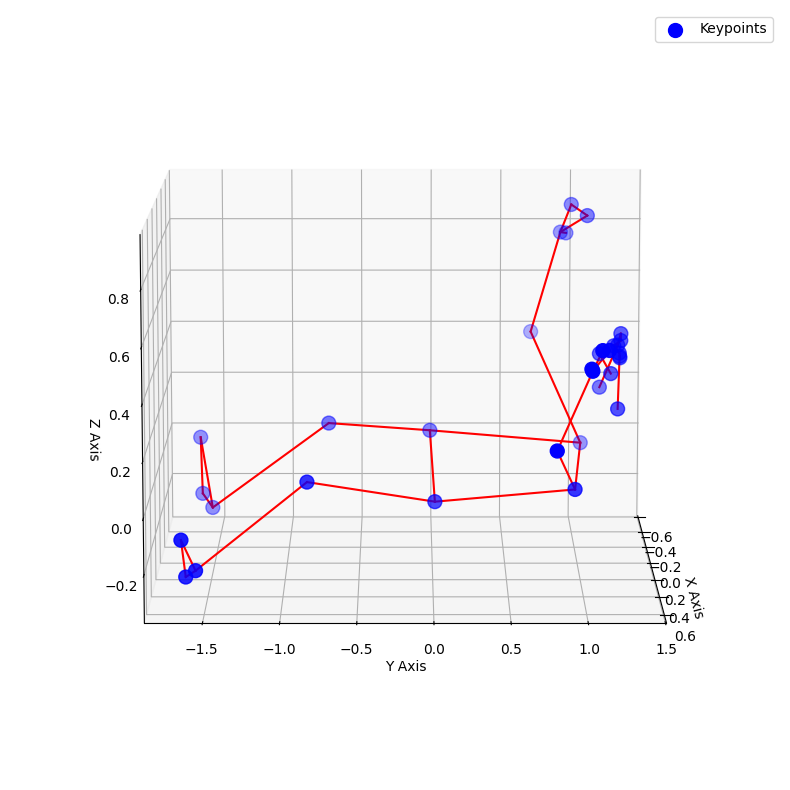

Visualizing raw keypoints...


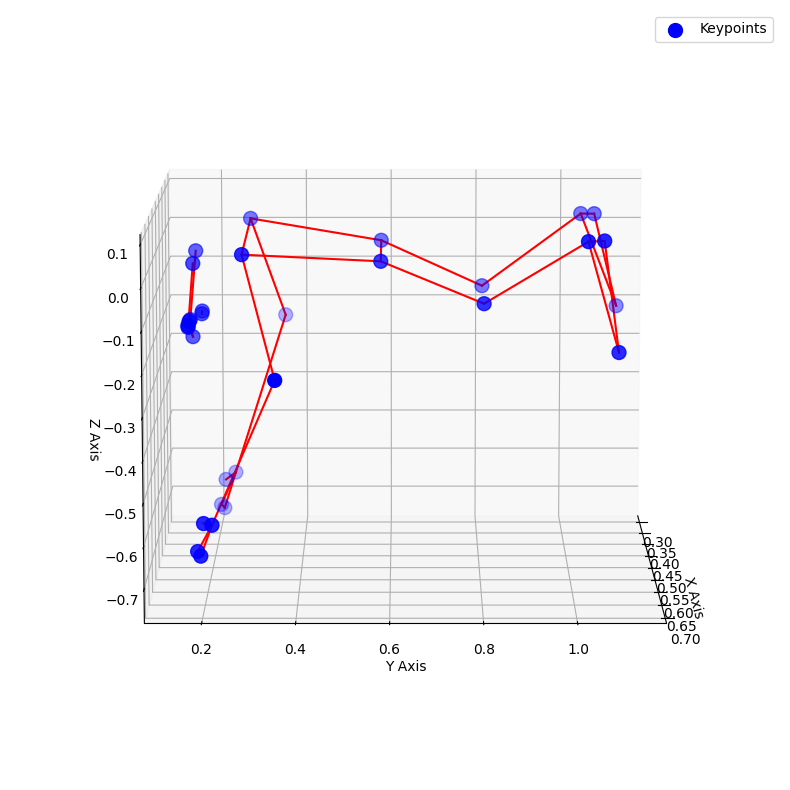

In [236]:


# --- Select a frame to visualize ---
selected_frame = 20

print("Visualizing normalized keypoints...")
plot_keypoints(extracted_norm, selected_frame)
print("Visualizing raw keypoints...")
plot_keypoints(extracted_raw, selected_frame)